# Visualizing data in 3-D reduced to 2-D

In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline

a = np.random.normal(14, 3, 100) 
b = np.random.normal(10, 3, 100)
x = (9*a) - (2*b)
y = (-7*a) - b
z = (5*a) - (12*b)
A1 = np.row_stack([x, y, z]) #places data into a matrix stacking each variable as a row
A1 = A1.T
df1 = pd.DataFrame(data= A1
                 , columns =['x','y','z'])

a2 = np.random.normal(-8, 3, 100) 
b2 = np.random.normal(-2, 3, 100)
x2 = (9*a2) - (2*b2)
y2 = (-7*a2) - b2
z2 = (5*a2) - (12*b2)
A2 = np.row_stack([x2, y2, z2]) #places data into a matrix stacking each variable as a row
A2 = A2.T
df2 = pd.DataFrame(data= A2
                 , columns =['x','y','z'])

a3 = np.random.normal(24, 3, 100) 
b3 = np.random.normal(17, 3, 100)
x3 = (9*a3) - (2*b3)
y3 = (-7*a3) - b3
z3 = (5*a3) - (12*b3)
A3 = np.row_stack([x3, y3, z3]) #places data into a matrix stacking each variable as a row
A3 = A3.T
df3 = pd.DataFrame(data= A3
                 , columns =['x','y','z'])


df = pd.concat([df1, df2, df3], axis = 0)

df.head(15)

,x,y,z
0,117.735004,-114.671430,-33.016730
1,132.303524,-128.398640,-35.132744
2,86.166004,-93.314948,-64.177851
3,147.002530,-140.612476,-30.295544
4,75.118770,-87.262257,-81.136114
5,118.292600,-120.707190,-56.576659
6,107.738084,-109.884011,-51.301893
7,133.954500,-121.444971,0.884492
8,106.005568,-117.798015,-91.726518
9,61.686066,-67.815136,-50.253193


## Visualize Data in 3D

Populating the interactive namespace from numpy and matplotlib


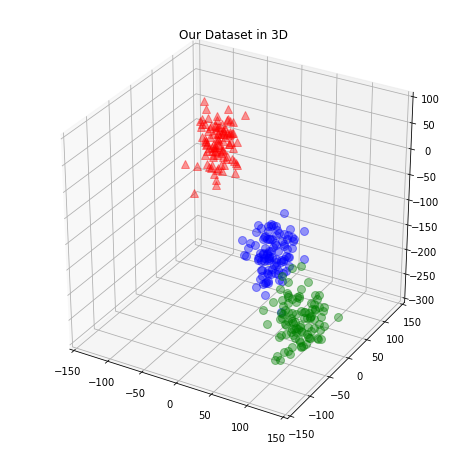

In [2]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax3d
from mpl_toolkits.mplot3d import proj3d


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d') 
ax.plot(A1[:,0], A1[:,1], A1[:,2], 'o', markersize=8, color='blue', alpha=0.4)
ax.plot(A2[:,0], A2[:,1], A2[:,2], '^', markersize=8, color='red', alpha=0.4)
ax.plot(A3[:,0], A3[:,1], A3[:,2], 'o', markersize=8, color='green', alpha=0.4)

#adjust axes ranges based on each data set
ax.set_xlim(-150,150) 
ax.set_ylim(-150,150) 
ax.set_zlim(-300,100) 

plt.title('Our Dataset in 3D')
plt.show()

# Standardize Data

In [3]:
features = ['x', 'y', 'z']

# Separating out the features
data_pts = df.loc[:, features].values #df.loc accesses a group of rows or columns

# Standardizing the features by subtracting the mean
mean_vec = np.mean(data_pts, axis=0) #creating vector of means
std_data_pts = data_pts - mean_vec #subtracting the means and normalizing

pd.DataFrame(data = std_data_pts, columns = features).head(15)

,x,y,z
0,42.516304,-35.846123,11.783953
1,57.084823,-49.573333,9.667939
2,10.947303,-14.489641,-19.377167
3,71.783829,-61.787169,14.505140
4,-0.099930,-8.436950,-36.335430
5,43.073900,-41.881883,-11.775976
6,32.519384,-31.058704,-6.501210
7,58.735799,-42.619664,45.685175
8,30.786868,-38.972708,-46.925835
9,-13.532634,11.010171,-5.452510


## Find Covariance Matrix

In [4]:
M = np.cov(std_data_pts.T)
print(M)
M.shape

[[ 11926.41117253 -11433.637007    -2567.21010135]
 [-11433.637007    11049.8536493    2838.78104384]
 [ -2567.21010135   2838.78104384   2161.68883807]]


(3, 3)

## Find Eigenvalues and Eigenvectors

In [5]:
e, v = np.linalg.eig(M) 
# finds the eigenvalues and vectors and stores them separately into e and then v
print (e)
print (v)

[ 2.36099843e+04 -2.69620056e-12  1.52796936e+03]
[[-0.7079969   0.66237402  0.24495113]
 [ 0.68411583  0.72935566  0.00508528]
 [ 0.17528814 -0.17117531  0.96952209]]


## Sort Eigenvalues/vectors Largest to Smallest

In [6]:
idx = np.argsort(e)[::-1]
e = e[idx] #orders eigen values based on index of largest to smallest eigenvalues
e = np.real_if_close(e) #adjusts eigenvalues to be real numbers
v = v[:, idx]#adjusts the eigenvectors to correspond to eigenvalues
print(v)

[[-0.7079969   0.24495113  0.66237402]
 [ 0.68411583  0.00508528  0.72935566]
 [ 0.17528814  0.96952209 -0.17117531]]


## Plot with Eigenvectors

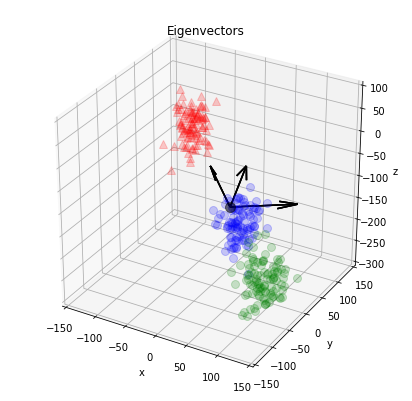

In [7]:
mean_x = np.mean(data_pts[:,0])
mean_y = np.mean(data_pts[:,1])
mean_z = np.mean(data_pts[:,2])
multiplier = np.matrix('100 0 0; 0 100 0; 0 0 100')
vec = v*multiplier

from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(A1[:,0], A1[:,1], A1[:,2], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot(A2[:,0], A2[:,1], A2[:,2], '^', markersize=8, color='red', alpha=0.2)
ax.plot(A3[:,0], A3[:,1], A3[:,2], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='black', alpha=0.5)

origin = [mean_x, mean_y, mean_z]
X, Y, Z = zip(origin, origin, origin) 
U, V, W = zip(vec[:,0], vec[:,1], vec[:,2])
ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.3, color='black')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-150,150) 
ax.set_ylim(-150,150) 
ax.set_zlim(-300,100) 

plt.title('Eigenvectors')
plt.show()


## Determine Amount of Variance and Select Principle Components

In [8]:
expvar = e/e.sum() #will give the percent of variance covered by each eigenvalue/vector
print(expvar) 

[ 9.39216637e-01  6.07833627e-02 -1.07256167e-16]


## Selecting PCs

In [9]:
nvar = 3 #number of variables
ncomp = 2 #number of components
remove = nvar-ncomp
e = e[0:-remove] #indexes from 0 to everything except for the remove indexes at the end
print(e)
v = v[:, :-remove] #all rows and all columns except the removed
print(v)
v.shape

[23609.9843046  1527.9693553]
[[-0.7079969   0.24495113]
 [ 0.68411583  0.00508528]
 [ 0.17528814  0.96952209]]


(3, 2)

## Plot PCs on Data

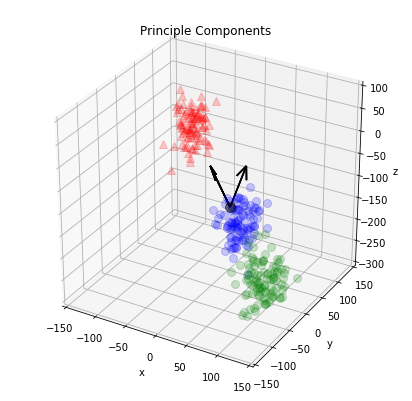

In [10]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(A1[:,0], A1[:,1], A1[:,2], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot(A2[:,0], A2[:,1], A2[:,2], '^', markersize=8, color='red', alpha=0.2)
ax.plot(A3[:,0], A3[:,1], A3[:,2], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='black', alpha=0.5)

origin = [mean_x, mean_y, mean_z]
X, Y, Z = zip(origin, origin, origin) 
U, V, W = zip(vec[:,0], vec[:,1], vec[:,0])
ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.3, color='black')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-150,150) 
ax.set_ylim(-150,150) 
ax.set_zlim(-300,100) 

plt.title('Principle Components')
plt.show()


## Dimension Reduction and Change of Basis for PCA
In this section we will perform matrix multiplication of the standardized data and the vectors of the principal components to get a new data matrix that will have n rows and m columns (where n= # of observations, and m= # of PCs)

In [11]:
PCdata = std_data_pts.dot(v)
PCdata.shape
principalDf = pd.DataFrame(data = PCdata
             , columns = ['PC 1', 'PC 2'])
principalDf.head(15)

,PC 1,PC 2
0,-52.558724,21.656932
1,-72.635104,23.104179
2,-21.059837,-16.178721
3,-90.549729,31.332379
4,-12.070271,-35.295385
5,-61.212435,-1.079049
6,-45.410958,1.504651
7,-62.733481,58.463455
8,-56.684395,-38.152542
9,16.157535,-8.545173


## Plot Data in Reduced Dimensions

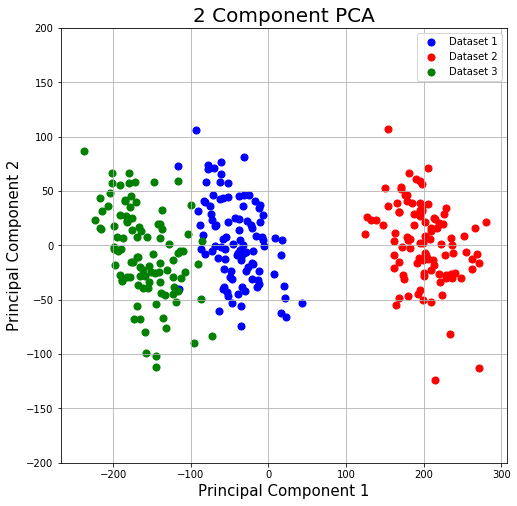

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ax.scatter(principalDf.loc[0:99, 'PC 1']
               , principalDf.loc[0:99, 'PC 2']
               , c = 'blue'
               , s = 50
               , label = 'Dataset 1')
ax.scatter(principalDf.loc[100:199, 'PC 1']
               , principalDf.loc[100:199, 'PC 2']
               , c = 'red'
               , s = 50
               , label = 'Dataset 2')
ax.scatter(principalDf.loc[200:300, 'PC 1']
               , principalDf.loc[200:300, 'PC 2']
               , c = 'green'
               , s = 50
               , label= 'Dataset 3')

#can use these lines of code to adjust axes ranges
#ax.set_xlim(-250,250) 
ax.set_ylim(-200,200) 

ax.legend()
ax.grid()